### COVID 19 data plotter - experimental phase


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv file right from the GitHub page
### (It works with the package pandas!)

In [6]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"


df=pd.read_csv(url)
df.set_index("UID")
df.shape

(3256, 96)

### I use here some basic coding methods to analyze the column names in the Pandas dataframe, instead of Pandas methods.


In [8]:
j=0
datacol=[] # list for collecting all column indices: only columns with data
datelist=[] # list with the date strings
for c in df.columns:
    if c=="Province_State":
        col_state=j
    if c=="Admin2":
        col_admin2=j
    if "/20" in c:
        datacol.append(j)
        datelist.append(c)
    j=j+1
#datacol=np.array(datacol)

### Here we select one row of data: In this case New York City, essentially

You can look up other states and administrative districts 
and update the variable mystate, myadmin2.

At the end we put the number of positive cases into the array named x



In [10]:
mystate="New York"
myadmin2="New York"
# we use our old-fashioned method, Pandas allows much more powerful ways to work with data frames
rowlist=[]
k=0
while k<df.shape[0]: # for all rows
    state=df.iloc[k,col_state]
    admin2=df.iloc[k,col_admin2]
    if state==mystate and admin2 == myadmin2:
        rowlist.append(k)
        print ("found the row for my state and admin2", k)
        print (admin2,state)
        print (df.iloc[k,datacol])
        x=df.iloc[k,datacol]
    k=k+1
    
x=np.array(x,dtype=int)


found the row for my state and admin2 1863
New York New York
1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         0
2/1/20          0
2/2/20          0
2/3/20          0
2/4/20          0
2/5/20          0
2/6/20          0
2/7/20          0
2/8/20          0
2/9/20          0
2/10/20         0
2/11/20         0
2/12/20         0
2/13/20         0
2/14/20         0
2/15/20         0
2/16/20         0
2/17/20         0
2/18/20         0
2/19/20         0
2/20/20         0
            ...  
3/17/20       814
3/18/20      1871
3/19/20      3954
3/20/20      5151
3/21/20      7530
3/22/20      9654
3/23/20     12305
3/24/20     14904
3/25/20     17856
3/26/20     21873
3/27/20     25573
3/28/20     29776
3/29/20     33768
3/30/20     37453
3/31/20     43119
4/1/20      47439
4/2/20      51809
4/3/20      57159
4/4/20      63306
4/5/20      67551
4/6/20      72181
4/7

In [11]:
# dealing with dates for nicer time axis labeling in the plots
# help and examples can be found here
# https://www.journaldev.com/23365/python-string-to-datetime-strptime
import datetime as dt
time=[]
for datestring in datelist:
    t=dt.datetime.strptime(datestring, '%m/%d/%y')
    time.append(t)
    #print(t)
time=np.array(time)

/kt11/ktyle/anaconda3_201903/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


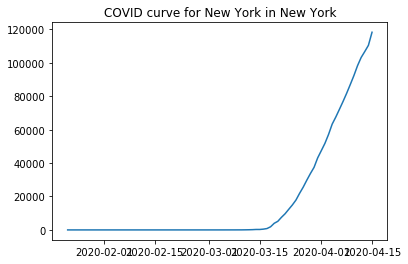

In [12]:
plt.plot(time,x)
#plt.scatter(np.log2(x[0:-1]),np.log2(dx))
plt.title("COVID curve for "+myadmin2+" in "+mystate)
plt.show()

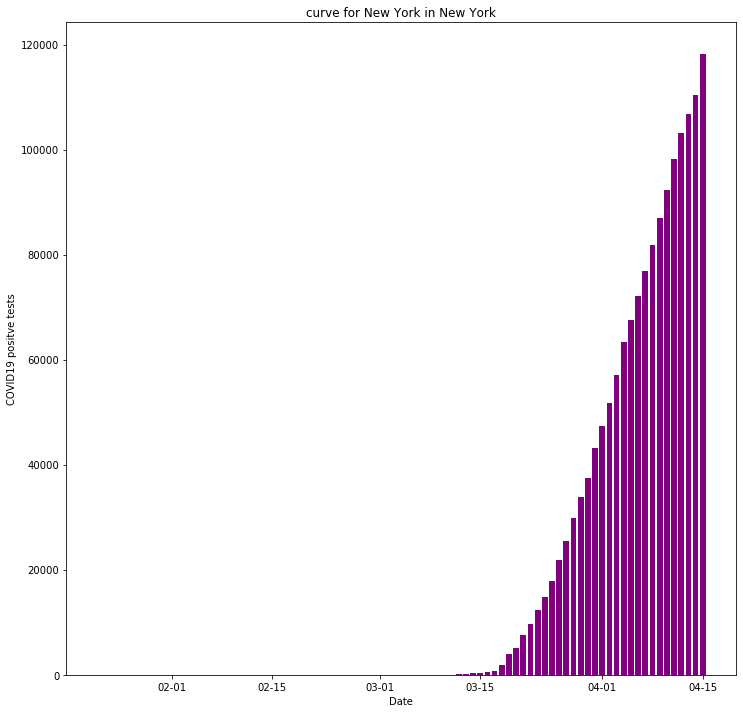

In [13]:
# better labels for dates:
# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(time,
       x,
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="COVID19 positve tests",
       title="curve for "+myadmin2+" in "+mystate)

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [14]:
ipos=x>0
# work only with positive values
x=x[ipos]
dx=x[1:]-x[0:-1]

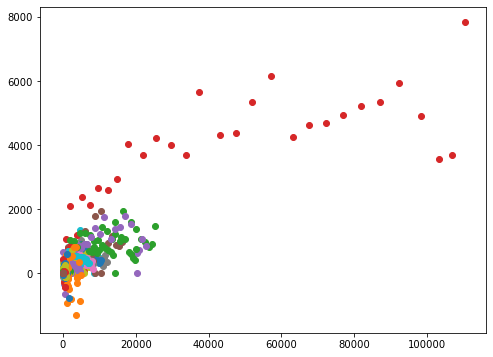

In [15]:
# first plots 
plt.figure(figsize=[8,6])
rowlist=[]
k=0
while k<df.shape[0]: # for all rows
    state=df.iloc[k,col_state]
    admin2=df.iloc[k,col_admin2]
    #print (k, state, admin2)
    x=df.iloc[k,datacol]
    k=k+1
    x=np.array(x,dtype=int)
    ipos=x>0
    # work only with positive values
    x=x[ipos]
    dx=x[1:]-x[0:-1]
    plt.scatter(x[0:-1],dx)
plt.show()